## Example from [Fitch2019]

In [1]:
%run ../imports.py

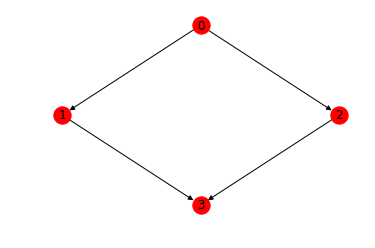

In [2]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2,3])
G.add_edges_from([
    (0,1),
    (1,3),
    (2,3),
    (0,2)
])
N = nx.number_of_nodes(G)
plt.axis('off')
nx.draw_networkx(G, pos=graphviz_layout(G, prog='dot'))

In [3]:
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

3

### Symmetrization

In [4]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [5]:
Q

matrix([[ 0.7257, -0.4647, -0.4647,  0.2037],
        [-0.4727, -0.1845, -0.1845,  0.8417],
        [ 0.    , -0.7071,  0.7071,  0.    ]])

Create undirected graph from the equivalent Laplacian

In [6]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        eqG.add_edge(i,j,weight=eqL[i,j])

In [7]:
eqL

matrix([[ 1.2273, -0.6818, -0.6818,  0.1364],
        [-0.6818,  1.0455,  0.0455, -0.4091],
        [-0.6818,  0.0455,  1.0455, -0.4091],
        [ 0.1364, -0.4091, -0.4091,  0.6818]])

In [8]:
np.linalg.matrix_rank(eqL)

3

In [9]:
posG, negG = separate_graphs(eqL)

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


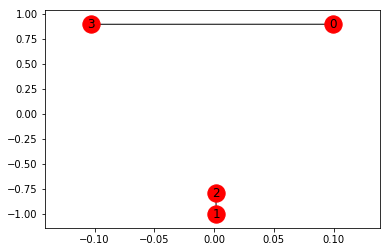

In [10]:
nx.draw_networkx(negG)

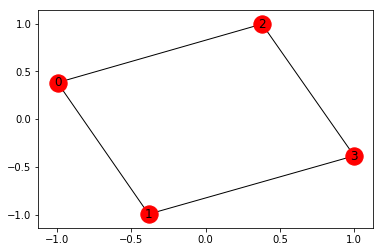

In [11]:
nx.draw_networkx(posG)

In [12]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        if(np.abs(eqL[i,j]) > 1e-6):
            eqG.add_edge(i,j,weight=eqL[i,j])

In [13]:
g_neg = eqG.subgraph([1,2,3,4,5])

In [14]:
np.linalg.eig(nx.laplacian_matrix(g_neg).todense())

(array([-1.2273e+00, -3.1818e-01, -1.3812e-16]),
 matrix([[ 4.0825e-01,  7.0711e-01,  5.7735e-01],
         [ 4.0825e-01, -7.0711e-01,  5.7735e-01],
         [-8.1650e-01, -5.4774e-17,  5.7735e-01]]))

In [15]:
nx.laplacian_matrix(g_neg).todense()

matrix([[-0.3636, -0.0455,  0.4091],
        [-0.0455, -0.3636,  0.4091],
        [ 0.4091,  0.4091, -0.8182]])

In [16]:
np.divide(x,eqL)

matrix([[ 0.5093,  0.0611,  0.0611, -3.9722],
        [ 0.0611,  0.5978, -8.25  ,  0.5093],
        [ 0.0611, -8.25  ,  0.5978,  0.5093],
        [-3.9722,  0.5093,  0.5093,  1.4056]])

In [17]:
L

matrix([[ 2, -1, -1,  0],
        [ 0,  1,  0, -1],
        [ 0,  0,  1, -1],
        [ 0,  0,  0,  0]], dtype=int64)

In [18]:
eqL

matrix([[ 1.2273, -0.6818, -0.6818,  0.1364],
        [-0.6818,  1.0455,  0.0455, -0.4091],
        [-0.6818,  0.0455,  1.0455, -0.4091],
        [ 0.1364, -0.4091, -0.4091,  0.6818]])